In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import string
from collections import defaultdict

In [2]:
plt.rcParams["font.size"] = 16
SHOW_RG = False

In [3]:
with open("/home/zchenhj/workspace/vBao/vec_imdb_refined_costmodel/pg_run.txt") as f:
    data = f.read().split("\n")[2:]
data = [x.split(" ") for x in data if len(x) > 1 and (x[0] in string.digits or x[0] == "x")]

with open("/home/zchenhj/workspace/vBao/experiment_result/vec_imdb_baseline_refine/pg_run.txt") as ff:
    data2 = ff.read().split("\n")[2:]
data2 = [x.split(" ") for x in data2 if len(x) > 1 and (x[0] in string.digits or x[0] == "x")]

data = [(x[0], x[1], float(x[2]), x[3], float(x[4])) for x in data]
pg_data = data
pg_times = np.array([x[2] for x in pg_data])
pg_times -= np.min(pg_times)
pg_times /= 60

data2 = [(x[0], x[1], float(x[2]), x[3], float(x[4])) for x in data2]
pg_data2 = data2
pg_times2 = np.array([x[2] for x in pg_data2])
pg_times2 -= np.min(pg_times2)
pg_times2 /= 60


# check all queries workloads are the same:
for i in range(len(data)):
    name1 = data[i][3].split("/")[-1]
    name2 = data2[i][3].split("/")[-1]
    assert name1 == name2

final_pg_times = []
for i in range(len(pg_times2)):
    final_pg_times.append((pg_times2[i] + pg_times[i])/2)
    

def read_bao_data(fp):
    with open(fp) as f:
        data = f.read().split("\n")[2:]

    training_times = []
    for idx in range(len(data)):
        if data[idx].strip().startswith("Initial input channels"):
            prev_line = data[idx-1].split(" ")
            if prev_line[0] == "Retry":
                continue
            training_times.append(float(prev_line[2]))


    training_times = np.array(training_times)

    data = [x.split(" ") for x in data if len(x) > 1 and (x[0] in string.digits or x[0] == "x")]
    data = [(x[0], x[1], float(x[2]), x[3], float(x[4])) for x in data]
    bao_data = data

    bao_times = np.array([x[2] for x in bao_data])
    training_times -= np.min(bao_times)
    bao_times -= np.min(bao_times)

    bao_times /= 60
    training_times /= 60
    return bao_data, bao_times, training_times

bao_data, bao_times, training_times = read_bao_data("/home/zchenhj/workspace/vBao/vec_imdb_refined_costmodel/bao_run.txt")
if SHOW_RG:
    bao_rb_data, bao_rb_times, training_rb_times = read_bao_data("bao_with_regblock.txt")

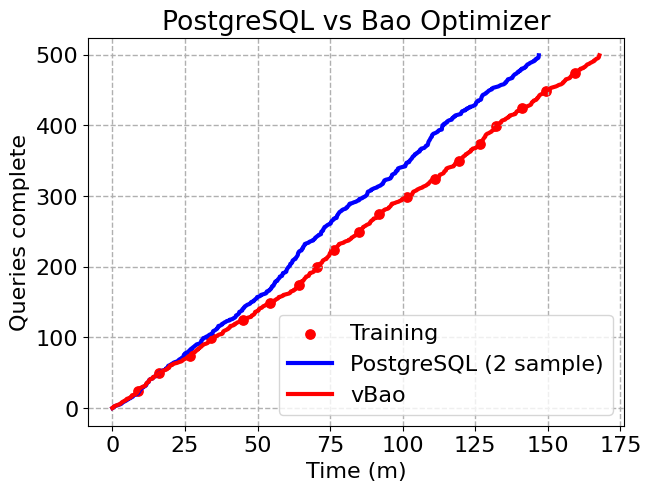

In [4]:
queries_complete = np.arange(0, len(pg_times))

fig, ax = plt.subplots(1, 1, constrained_layout=True)


train_y = []
train_rb_y = []
for tt in training_times:
    idx = np.searchsorted(bao_times, tt)
    train_y.append(idx)

    
plt.scatter(training_times, train_y, s=45, color="red", label="Training")

ax.plot(pg_times, queries_complete, label="PostgreSQL (2 sample)", lw=3, color='blue')
ax.plot(bao_times, queries_complete, label="vBao", lw=3, color='r')

ax.set_xlabel("Time (m)")
ax.set_ylabel("Queries complete")
ax.set_title("PostgreSQL vs Bao Optimizer")

ax.grid(linestyle="--", linewidth=1)
ax.legend()

analyze the time of PG

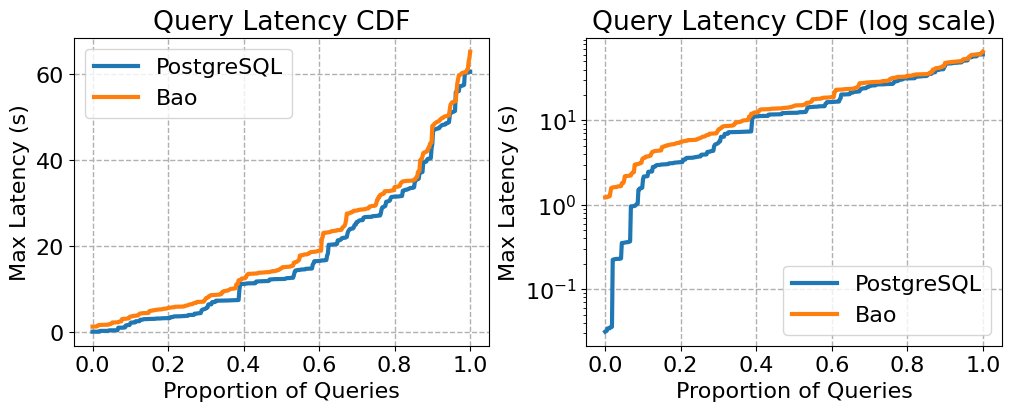

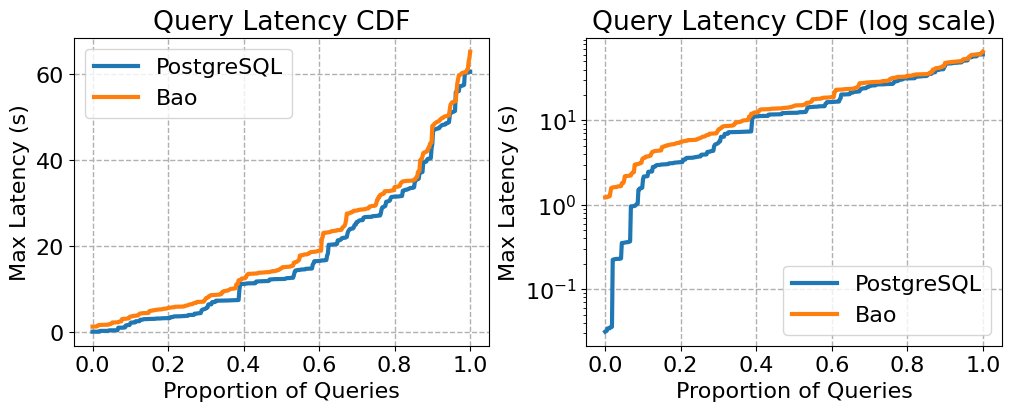

In [5]:
all_pg_times = sorted([x[4] for x in pg_data])
all_bao_times = sorted([x[4] for x in bao_data])

if SHOW_RG:
    all_bao_rb_times = sorted([x[4] for x in bao_rb_data])


fig, axes = plt.subplots(1, 2, figsize=(10, 4), constrained_layout=True)

ax = axes[0]
ax.plot(np.linspace(0, 1, len(all_pg_times)), all_pg_times, lw=3, label="PostgreSQL")
ax.plot(np.linspace(0, 1, len(all_pg_times)), all_bao_times, lw=3, label="Bao")

if SHOW_RG:
    ax.plot(np.linspace(0, 1, len(all_pg_times)), all_bao_rb_times, lw=3, label="Bao (w/ exploration)")

ax.grid(linestyle="--", linewidth=1)
ax.set_xlabel("Proportion of Queries")
ax.set_ylabel("Max Latency (s)")
ax.set_title("Query Latency CDF")
ax.legend()
#ax.set_yscale("log")


ax = axes[1]
ax.plot(np.linspace(0, 1, len(all_pg_times)), all_pg_times, lw=3, label="PostgreSQL")
ax.plot(np.linspace(0, 1, len(all_pg_times)), all_bao_times, lw=3, label="Bao")

if SHOW_RG:
    ax.plot(np.linspace(0, 1, len(all_pg_times)), all_bao_rb_times, lw=3, label="Bao (w/ exploration)")

ax.grid(linestyle="--", linewidth=1)
ax.set_xlabel("Proportion of Queries")
ax.set_ylabel("Max Latency (s)")
ax.set_title("Query Latency CDF (log scale)")
ax.legend()
ax.set_yscale("log")
fig

In [1]:
import numpy as np

In [2]:
z = "12"

t = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

t[0].dtype

dtype('int64')

In [3]:
t[0] = z

In [4]:
t[0].dtype

dtype('int64')

In [6]:
import numpy as np

x = [1, 2, 3, 4]
y = [4, 5]

x = [x, y]

result = np.asarray(x)
print(result)           # Output: [list([1, 2, 3, 4]) list([4, 5])]
print(result.dtype)     # Output: object

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.

In [7]:
arr = np.zeros(10)
arr[3] = 1
arr[4] = float(14)

In [8]:
arr

array([ 0.,  0.,  0.,  1., 14.,  0.,  0.,  0.,  0.,  0.])

In [10]:
x = np.array([1, 2, 3, 4, 5])
y = np.array([1, 25])

z = np.concatenate((x, y))

In [11]:
z

array([ 1,  2,  3,  4,  5,  1, 25])

In [14]:
import numpy
 
# Creating multi-dimension array
a = [1, 2, 3, 4]
b = [1, 2, 3, 6]
c = [1, 1, 3, 4]
d = 42

z = [a, b, c, d]
 
# Now we fix the error
np_array = numpy.array(z, dtype=np.ndarray)
 
print(np_array)

[list([1, 2, 3, 4]) list([1, 2, 3, 6]) list([1, 1, 3, 4]) 42]


In [15]:
import numpy
 
# Creating multi-dimension array
a = [1, 2, 3, 4]
b = [1, 2, 3, 6]
c = [1, 1, 3, 4]
d = 42

z = [a, b, c, d]
 
# Now we fix the error
np_array = numpy.array(z, dtype=np.ndarray)
 
print(np_array)

[list([1, 2, 3, 4]) list([1, 2, 3, 6]) list([1, 1, 3, 4]) 42]


In [16]:
import numpy as np

In [20]:
a = 10.678560282494745
b = 10.678560282494745
bf = 57687

def norm(x, lo, hi):
    return (np.log(x + 1) - lo) / (hi - lo)

norm(bf, a, b)

/tmp/ipykernel_3311333/1488390823.py:6: RuntimeWarning: divide by zero encountered in scalar divide
  return (np.log(x + 1) - lo) / (hi - lo)


inf

In [35]:
import numpy as np
accum = [np.array([1, 2, 3, 4])]
accum = [np.zeros(accum[0].shape)] + accum

In [36]:
accum

[array([0., 0., 0., 0.]), array([1, 2, 3, 4])]

In [38]:
from numpy import array

In [47]:
before = [array([1.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 1.        ,
       0.67691233, 0.        ]), array([0.       , 0.       , 0.       , 0.       , 0.       , 1.       ,
       0.       , 0.       , 0.       , 1.       , 0.0828312, 0.       ]), array([1.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 1.        ,
       0.67689019, 0.        ]), array([1.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 1.        ,
       0.67647789, 0.0284204 ]), array([1.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 1.        ,
       0.67646017, 0.0284204 ]), array([1.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 1.        ,
       0.67643715, 0.        ]), array([1.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 1.        ,
       0.67641595, 0.0284204 ]), array([1.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 1.        ,
       0.67640155, 0.14123125]), array([1.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 1.        ,
       0.67610123, 0.        ]), array([1.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 1.       , 0.6760913, 0.       ]), array([1.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 1.        ,
       0.67584361, 0.18498029]), array([1.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 1.        ,
       0.67526774, 0.18243116]), array([0.        , 0.        , 0.        , 0.        , 0.        ,
       1.        , 0.        , 0.        , 0.        , 1.        ,
       0.04540063, 0.        ]), array([1.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 1.        ,
       0.67523656, 0.31579494]), 0.0, array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 1.        , 0.        , 0.        , 1.        ,
       0.15786858, 0.        ]), array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 1.        , 0.        , 0.        , 1.        ,
       0.08098175, 0.07700538]), array([0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       1.       , 0.       , 0.       , 1.       , 0.0416081, 0.       ]), array([0.        , 0.        , 0.        , 0.        , 0.        ,
       1.        , 0.        , 0.        , 0.        , 1.        ,
       0.04402006, 0.0284204 ]), array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 1.        , 0.        , 0.        , 1.        ,
       0.25593022, 0.20451624]), array([0.        , 0.        , 0.        , 0.        , 0.        ,
       1.        , 0.        , 0.        , 0.        , 1.        ,
       0.04764737, 0.0284204 ]), array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 1.        , 0.        , 0.        , 1.        ,
       0.04773553, 0.        ]), array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 1.        , 0.        , 0.        , 1.        ,
       0.07150071, 0.2197772 ]), array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 1.        , 0.        , 1.        ,
       0.04074334, 0.        ]), array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 1.        , 0.        , 0.        , 1.        ,
       0.22970565, 0.        ])]

In [ ]:
for query in before:
    print("Test: ", query)
    if query != 12:
        print(query)

Test:  [1.         0.         0.         0.         0.         0.
 0.         0.         0.         1.         0.67691233 0.        ]
[1.         0.         0.         0.         0.         0.
 0.         0.         0.         1.         0.67691233 0.        ]
Test:  [0.        0.        0.        0.        0.        1.        0.
 0.        0.        1.        0.0828312 0.       ]
[0.        0.        0.        0.        0.        1.        0.
 0.        0.        1.        0.0828312 0.       ]
Test:  [1.         0.         0.         0.         0.         0.
 0.         0.         0.         1.         0.67689019 0.        ]
[1.         0.         0.         0.         0.         0.
 0.         0.         0.         1.         0.67689019 0.        ]


In [44]:
before.shape

(31, 12)

In [ ]:
after = np.array([array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), array([1.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 1.        ,
       0.67691233, 0.        ]), array([0.       , 0.       , 0.       , 0.       , 0.       , 1.       ,
       0.       , 0.       , 0.       , 1.       , 0.0828312, 0.       ]), array([1.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 1.        ,
       0.67689019, 0.        ]), array([1.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 1.        ,
       0.67647789, 0.0284204 ]), array([1.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 1.        ,
       0.67646017, 0.0284204 ]), array([1.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 1.        ,
       0.67643715, 0.        ]), array([1.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 1.        ,
       0.67641595, 0.0284204 ]), array([1.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 1.        ,
       0.67640155, 0.14123125]), array([1.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 1.        ,
       0.67610123, 0.        ]), array([1.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 1.       , 0.6760913, 0.       ]), array([1.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 1.        ,
       0.67584361, 0.18498029]), array([1.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 1.        ,
       0.67526774, 0.18243116]), array([0.        , 0.        , 0.        , 0.        , 0.        ,
       1.        , 0.        , 0.        , 0.        , 1.        ,
       0.04540063, 0.        ]), array([1.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 1.        ,
       0.67523656, 0.31579494]), 0.0, array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 1.        , 0.        , 0.        , 1.        ,
       0.15786858, 0.        ]), array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 1.        , 0.        , 0.        , 1.        ,
       0.08098175, 0.07700538]), array([0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       1.       , 0.       , 0.       , 1.       , 0.0416081, 0.       ]), array([0.        , 0.        , 0.        , 0.        , 0.        ,
       1.        , 0.        , 0.        , 0.        , 1.        ,
       0.04402006, 0.0284204 ]), array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 1.        , 0.        , 0.        , 1.        ,
       0.25593022, 0.20451624]), array([0.        , 0.        , 0.        , 0.        , 0.        ,
       1.        , 0.        , 0.        , 0.        , 1.        ,
       0.04764737, 0.0284204 ]), array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 1.        , 0.        , 0.        , 1.        ,
       0.04773553, 0.        ]), array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 1.        , 0.        , 0.        , 1.        ,
       0.07150071, 0.2197772 ]), array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 1.        , 0.        , 1.        ,
       0.04074334, 0.        ]), array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 1.        , 0.        , 0.        , 1.        ,
       0.22970565, 0.        ])])

In [42]:
after.shape

(32, 12)